In [380]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from abtem.core.energy import energy2wavelength
import abtem

#x = np.arange(-100, 101, dtype=float)
#r = x[:,None] ** 4 + x[None] ** 4

c = [1, -2, 1]
stencil = np.zeros((3,3))
stencil[1,:] = c
stencil[:,1] += c

c = [- 1 / 12, 4 / 3, -5 / 2, 4 / 3, - 1/ 12]
stencil = np.zeros((5,5))
stencil[2,:] = c
stencil[:,2] += c

# # c = [1 / 90, -3 / 20, 3 / 2, -49 / 18, 3 / 2, - 3/ 20, 1 / 90]
# # stencil = np.zeros((7,7))
# # stencil[3,:] = c
# # stencil[:,3] += c


# c = [-1 / 560, 8 / 315, -1 / 5, 8 / 5, -205 / 72, 8 / 5, -1 / 5, 8 / 315, -1/560]
# stencil = np.zeros((9,9))
# stencil[4,:] = c
# stencil[:,4] += c


#print(np.array2string(stencil))


In [381]:
wave0 = np.zeros((101,101), dtype=complex)

wave0[48:53,48:53] = 1

def step(wave, m):

    wave = scipy.ndimage.convolve(wave, stencil, mode="wrap") / 0.05 ** 2
    
    l = energy2wavelength(80e3)
    dz = .2
    
    return 1 / m * 1.j * l * dz / (4 * np.pi) * wave


# wave1 = wave0.copy()
# for m in range(1, 40):
#     wave1 = step(wave1, m)
#     wave0 += wave1



[########################################] | 100% Completed | 117.58 ms


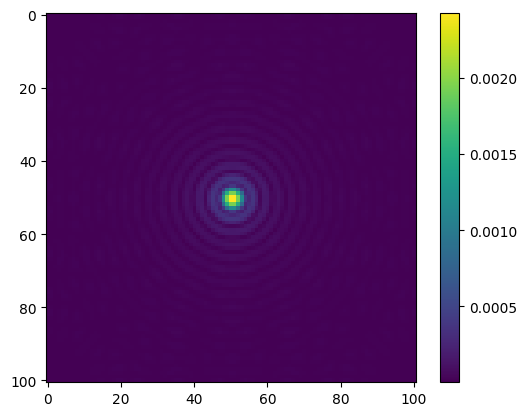

In [392]:
def step(wave, m):
    l = energy2wavelength(300e3)
    dz = .2
    for i in range(m):
        wave = scipy.ndimage.convolve(wave, stencil, mode="wrap") / 0.02 ** 2
    wave = 1 / np.math.factorial(m) * (1.j * l * dz / (4 * np.pi)) ** m * wave
    return wave

wave0 = abtem.Probe(gpts=101, semiangle_cutoff=60, extent=5, energy=300e3).build().compute().array.astype(np.complex128)

#wave0[48:53,48:53] = 1
#wave0[50,50] = 1

wave = np.zeros((101,101), dtype=complex)#wave0.copy()
for m in range(0, 10):
    wave += step(wave0, m)

plt.imshow(np.abs(wave))
plt.colorbar()

[########################################] | 100% Completed | 116.36 ms


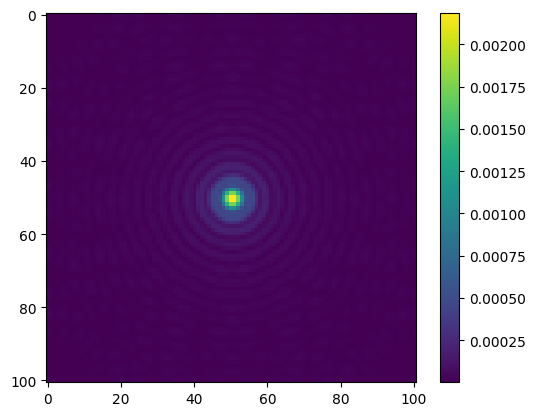

In [385]:
from abtem.multislice import _fresnel_propagator_array

f = _fresnel_propagator_array(.5, (101,)*2, (0.02,)*2, 300e3, "cpu")

wave0 = abtem.Probe(gpts=101, semiangle_cutoff=60, extent=5, energy=300e3).build().compute().array.astype(np.complex128)

#wave = np.zeros((101,101), dtype=complex)
#wave[50,50] = 1
#wave[48:53,48:53] = 1

wave = np.fft.ifft2(f * np.fft.fft2(wave0))

plt.imshow(np.abs(wave))
plt.colorbar()